In [317]:
import numpy as np

In [318]:
import pandas as pd

In [319]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [320]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [321]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [322]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [323]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

In [324]:
data = pd.merge(transactions_customers, products, on='ProductID', how='left')

In [325]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [328]:
data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [329]:
data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

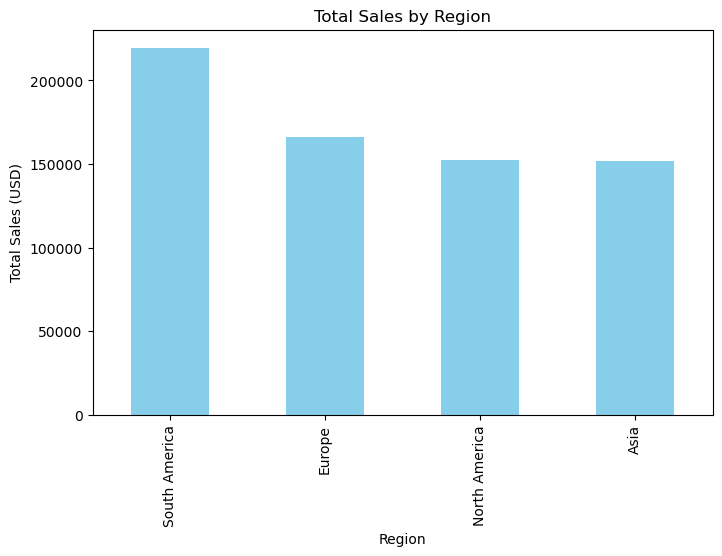

In [330]:
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

# Regional Sales Performance: South America Dominates
South America leads in total sales, significantly surpassing other regions, while Europe, North America, and Asia display comparable performance. This indicates strong regional demand in South America and suggests opportunities for market expansion or strategy refinement in other areas.

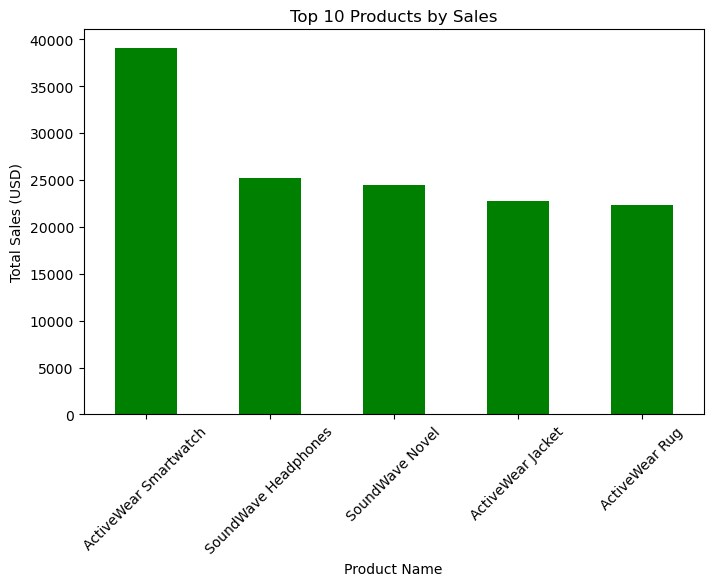

In [332]:
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='green')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

## Top 5 Products by Total Sales Revenue
The "ActiveWear Smartwatch" is the top-selling product, significantly outperforming all other products shown. The remaining products ("SoundWave Headphones," "SoundWave Novel," "ActiveWear Jacket," and "ActiveWear Rug") have relatively similar sales figures, clustering below the leading smartwatch. This suggests a strong market demand for the smartwatch compared to other offerings.

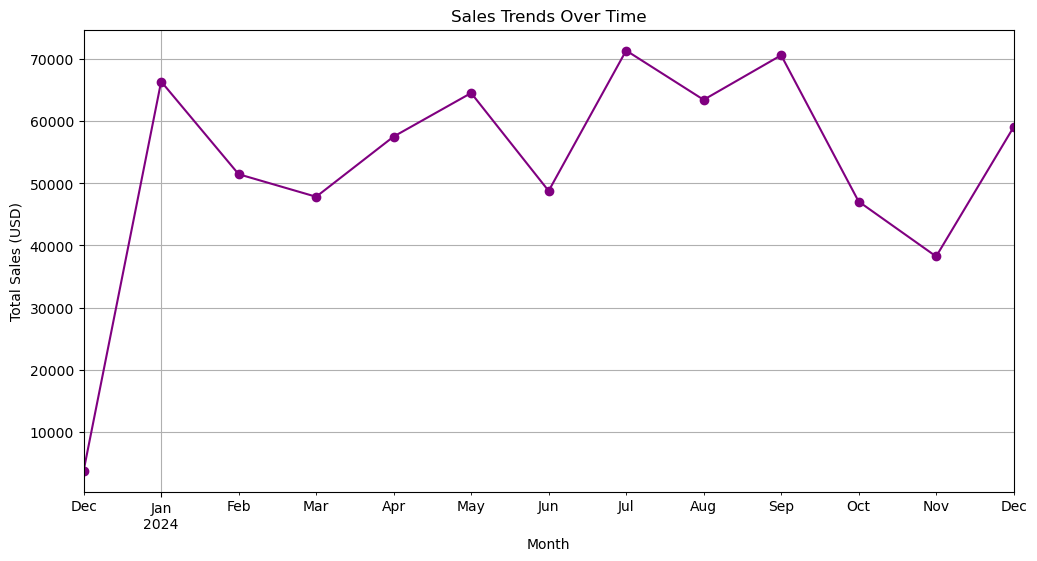

In [334]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
sales_trends = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trends.plot(color='purple', marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()


## Seasonal Sales Patterns in 2024
Sales in 2024 demonstrate clear seasonality, with peak performance in July and September, likely driven by successful campaigns or external factors. A predictable post-holiday dip occurs in January/February, followed by a mid-year recovery from March to May. After the September peak, sales consistently decline towards the end of the year, reaching a low point in November before the holiday season begins again in December.

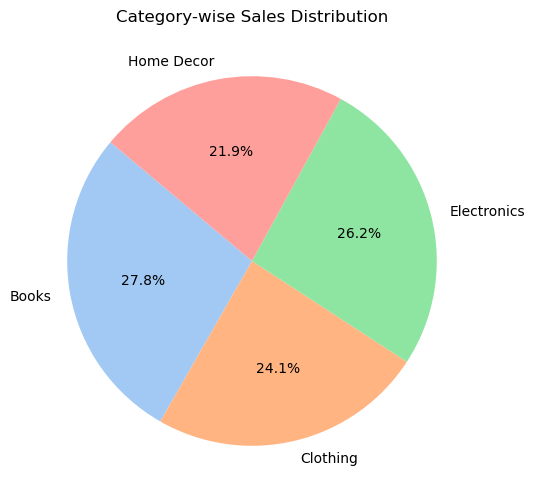

In [336]:
category_sales = data.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Category-wise Sales Distribution")
plt.ylabel("")  # Remove default y-label
plt.show()

## Sales Share by Product Category
Books represent the largest portion of sales (27.8%), closely followed by Electronics (26.2%), indicating these two categories are the primary revenue drivers. Clothing and Home Decor contribute slightly less, at 24.1% and 21.9% respectively.

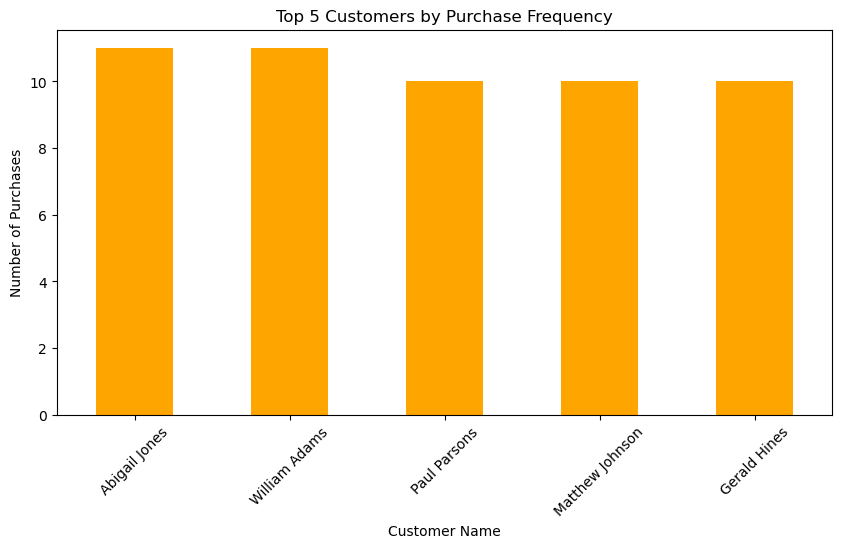

In [338]:
customer_frequency = data['CustomerName'].value_counts().head(5)
plt.figure(figsize=(10, 5))
customer_frequency.plot(kind='bar', color='orange')
plt.title("Top 5 Customers by Purchase Frequency")
plt.xlabel("Customer Name")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

## Key Findings from the Exploratory Data Analysis

- **South America Leads Regional Sales:** South America is a key market, significantly outperforming Europe, North America, and Asia in total sales. This highlights a strong regional demand and suggests focusing resources on maintaining this success while exploring growth opportunities in other regions.

- **Smartwatch Dominates Product Sales :** The "ActiveWear Smartwatch" is a clear winner, outselling all other products by a considerable margin. This indicates strong market demand and suggests prioritizing its production and marketing. Other products show similar, lower sales, indicating potential for improvement.

- **Sales Show Clear Seasonality :** Sales fluctuate predictably throughout the year, peaking in July and September, likely due to seasonal factors or successful campaigns. A post-holiday slump occurs in January/February, followed by a mid-year recovery. This seasonality should inform inventory management and marketing strategies.

- **Books and Electronics Drive Revenue :** Books and Electronics are the top-performing product categories, contributing over half of total sales (27.8% and 26.2%, respectively). These categories are crucial revenue drivers and should be prioritized in product development and marketing efforts.

- **Loyal Customer Base :** Abigail Jones and William Adams are the most frequent purchasers, closely followed by three other customers. This small group demonstrates consistent purchase behavior, suggesting a valuable core of loyal customers. Retention strategies targeting this group should be prioritized.
